In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
os.chdir("/content/drive/MyDrive/CMPT733_Final_Project")
!ls

covid_19_data.csv
milestone_presentation.docx
Milestone_with_SFU_ppt_template.pptx
preprocess_visualization_covid19_us_2.ipynb
preprocess_visualization_covid19_us.ipynb
project.ipynb
Project_Timeline.xlsx
SFU-Powerpoint-Template-Standard.pptx
state-geocodes-v2016.xls
us_counties_covid19_daily.csv
us_covid19_daily.csv
us_states_covid19_daily.csv


In [3]:
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install plotly==4.14.3

     |████████████████████████████████| 890kB 5.7MB/s 
     |████████████████████████████████| 6.5MB 17.7MB/s 
     |████████████████████████████████| 14.8MB 291kB/s 
     |████████████████████████████████| 184kB 4.3MB/s 
  Created wheel for pyshp: filename=pyshp-1.2.10-cp37-none-any.whl size=20468 sha256=4881a30142eaf56364b82b2befec15c45c2e4bd1554f18877761fbd14508138c
  Stored in directory: /root/.cache/pip/wheels/ba/1a/67/6a12977f362c33a15edc753daf92c6f01879dbf4db76faf0dd
Successfully built pyshp
     |████████████████████████████████| 225kB 6.0MB/s 
  Created wheel for shapely: filename=Shapely-1.6.3-cp37-cp37m-linux_x86_64.whl size=635618 sha256=47c5a8224cd441d71f45a91a9c451fdda8f71cc973a0a795ef3ffefdd7e77d36
  Stored in directory: /root/.cache/pip/wheels/12/87/ca/56f7f9f986d5041c31b61bd01fc14f16675c4123c1f073750c
Successfully built shapely
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing install

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [5]:
us_covid_state_data = pd.read_csv('us_states_covid19_daily.csv')
us_covid_state_data['date'] = pd.to_datetime(us_covid_state_data['date'].astype(str))
us_covid_state_data = us_covid_state_data.fillna(0)
us_covid_state_data.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-12-06,AK,35720.0,0.0,1042056.0,0.0,totalTestsViral,1077776.0,164.0,799.0,0.0,0.0,21.0,0.0,7165.0,A,12/6/2020 03:59,2020-12-06T03:59:00Z,12/05 22:59,143.0,799.0,2020-12-06T03:59:00Z,1077776.0,43746.0,1032815.0,0.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,757,9788,1077776,10545,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,0.0
1,2020-12-06,AL,269877.0,45962.0,1421126.0,0.0,totalTestsPeopleViral,1645041.0,1927.0,26331.0,0.0,2290.0,0.0,1317.0,168387.0,A,12/6/2020 11:00,2020-12-06T11:00:00Z,12/06 06:00,3889.0,26331.0,2020-12-06T11:00:00Z,0.0,0.0,0.0,223915.0,3462.0,427.0,0.0,1645041.0,0.0,0.0,0.0,74784.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2288,5769,1691003,7880,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,0.0
2,2020-12-06,AR,170924.0,22753.0,1614979.0,0.0,totalTestsViral,1763150.0,1076.0,9401.0,374.0,0.0,179.0,1038.0,149490.0,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,2660.0,9401.0,2020-12-06T00:00:00Z,1763150.0,0.0,1614979.0,148171.0,2437.0,223.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155934.0,27710.0,21856.0,3300.0,5,1542,13244,1785903,14704,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,0.0
3,2020-12-06,AS,0.0,0.0,2140.0,0.0,totalTestsViral,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,0.0,2020-12-01T00:00:00Z,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,0,0,2140,0,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,0.0
4,2020-12-06,AZ,364276.0,12590.0,2018813.0,0.0,totalTestsPeopleViral,2370499.0,2977.0,28248.0,714.0,0.0,462.0,0.0,56382.0,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,6950.0,28248.0,2020-12-06T00:00:00Z,0.0,0.0,0.0,351686.0,6431.0,519.0,0.0,2370499.0,370928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5376,15661,2383089,20586,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,0.0


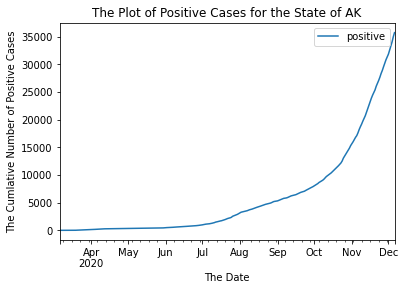

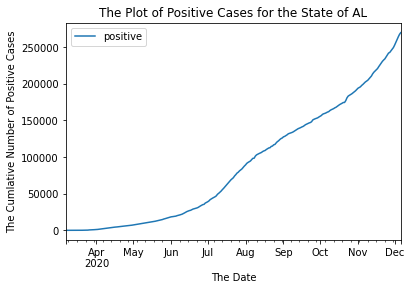

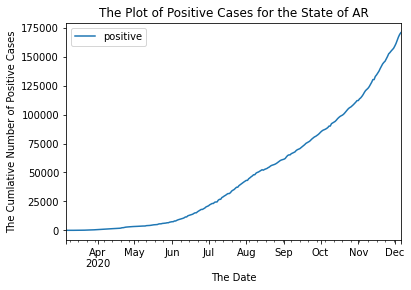

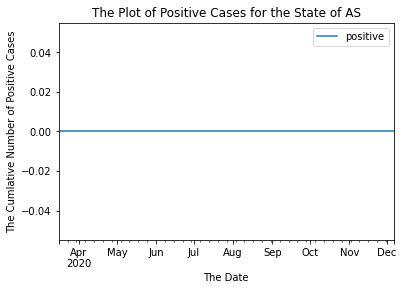

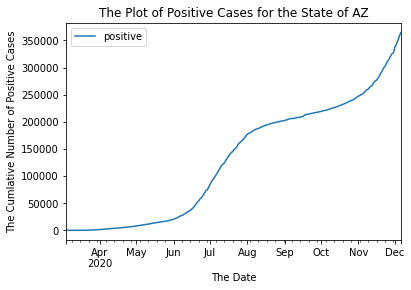

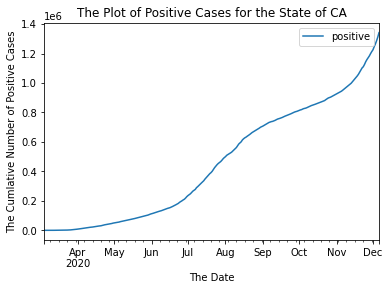

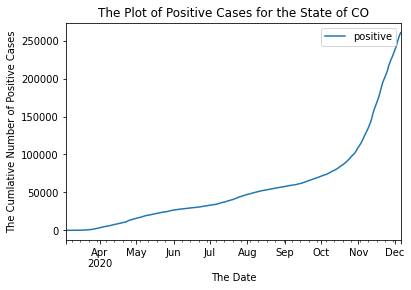

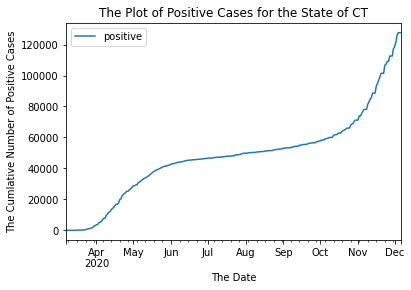

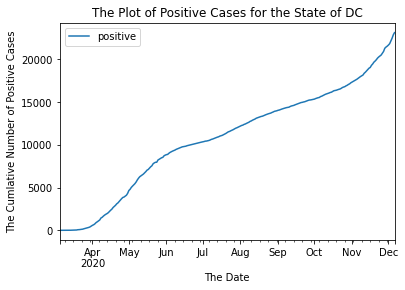

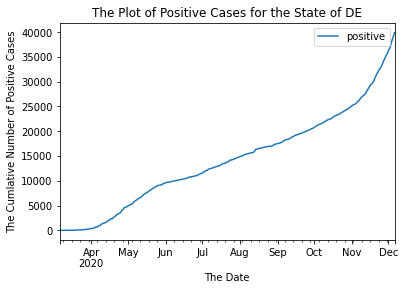

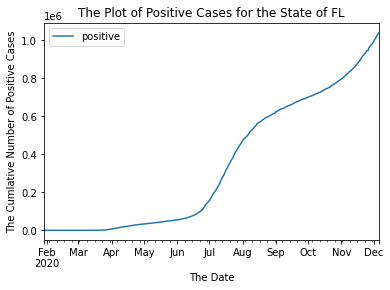

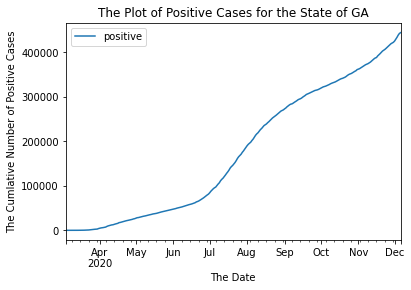

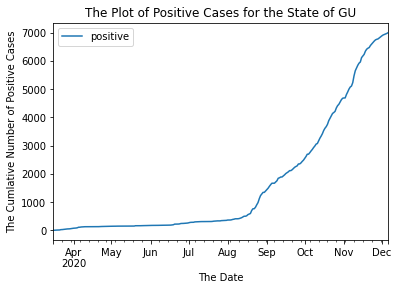

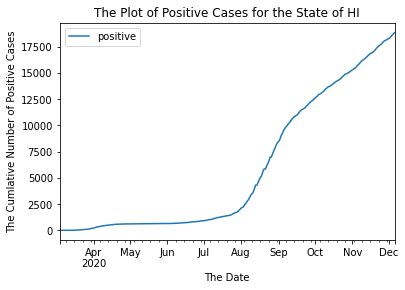

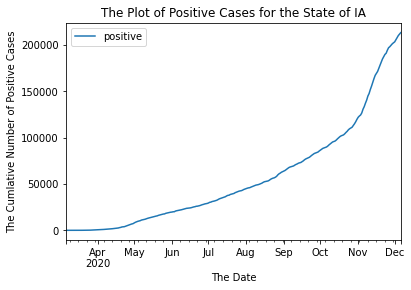

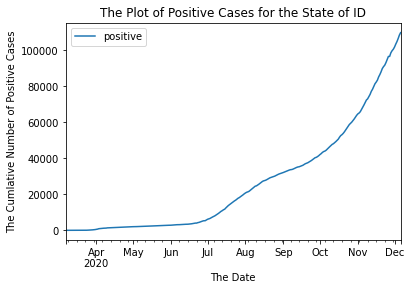

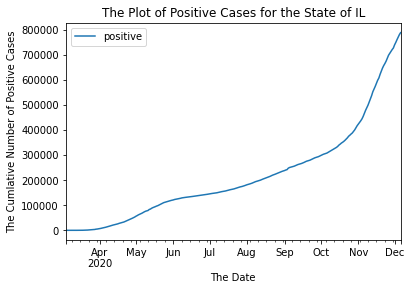

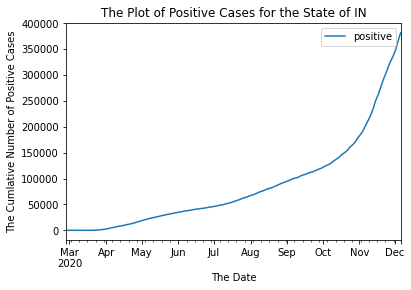

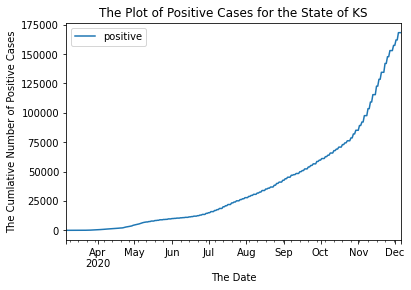

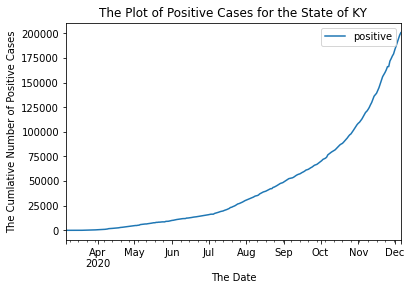

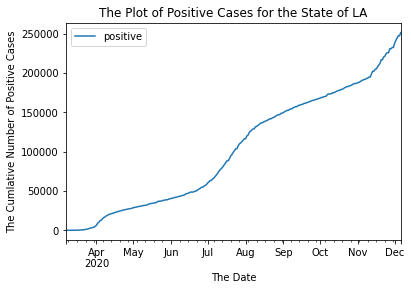

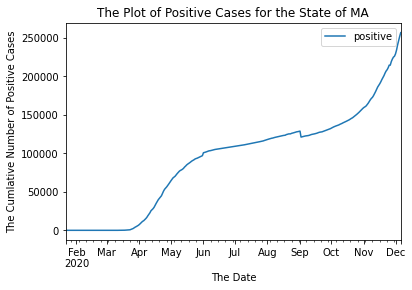

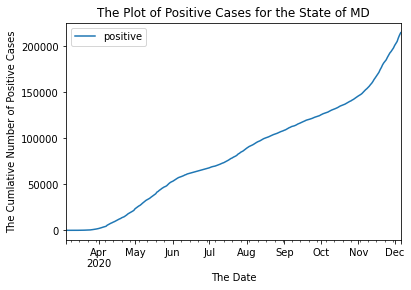

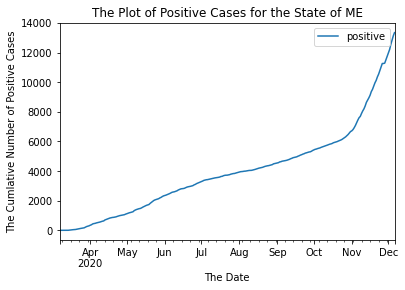

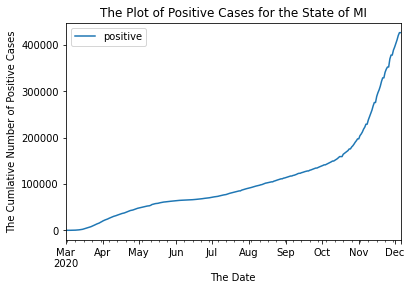

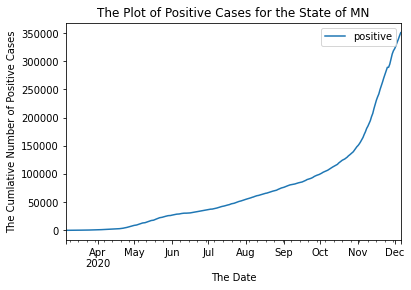

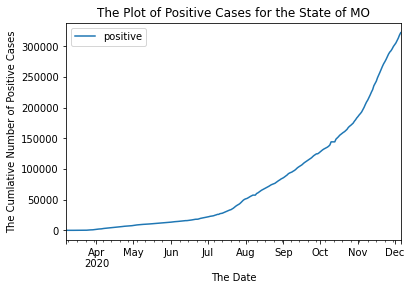

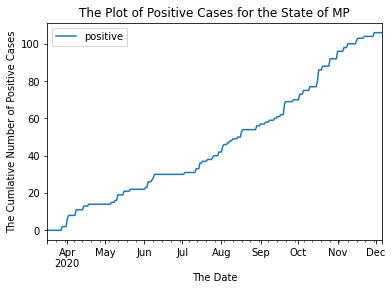

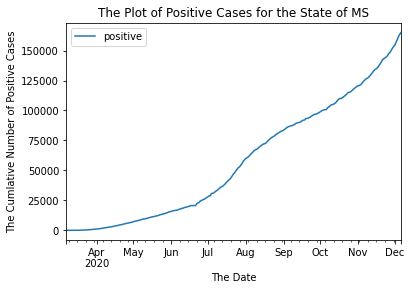

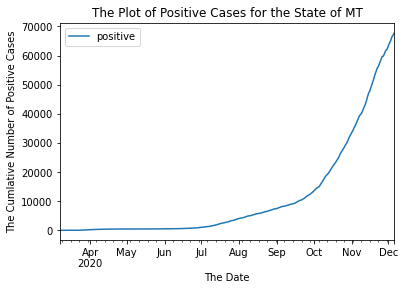

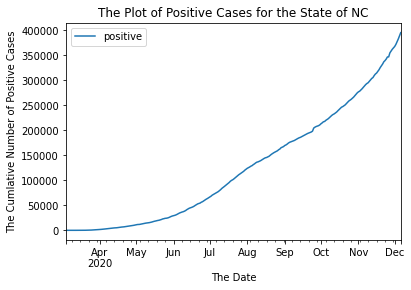

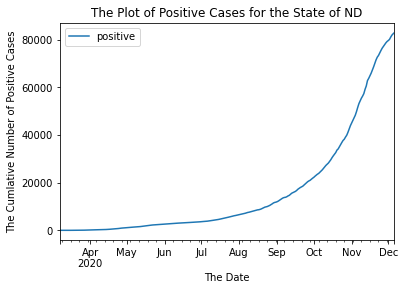

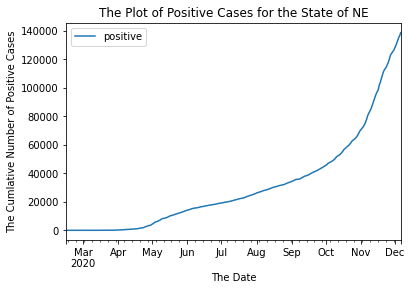

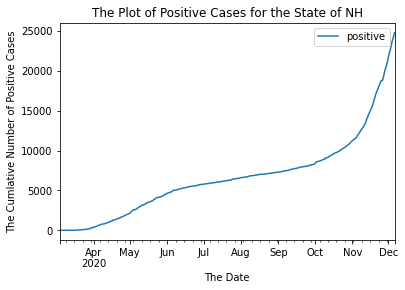

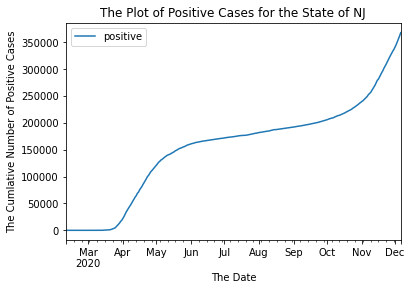

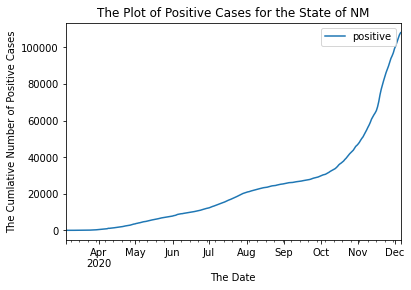

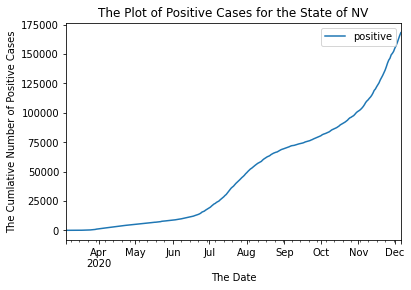

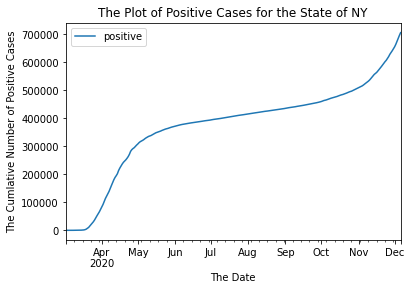

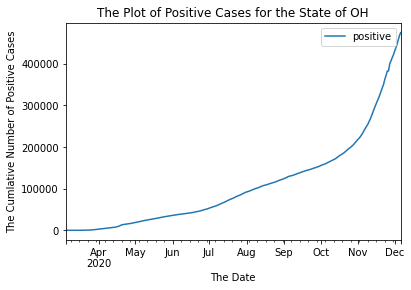

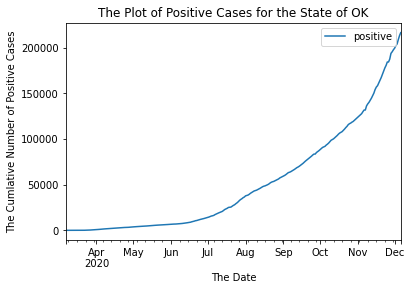

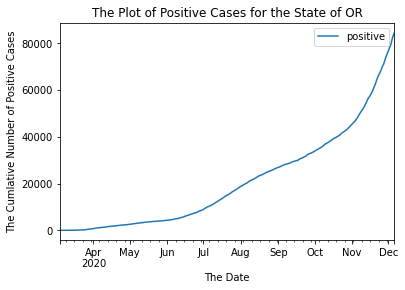

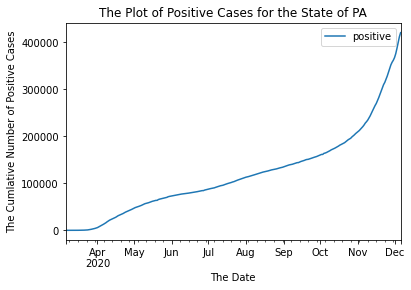

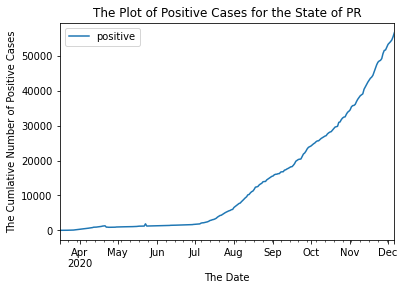

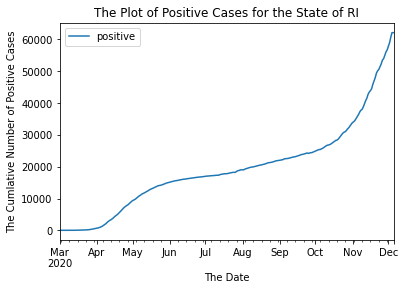

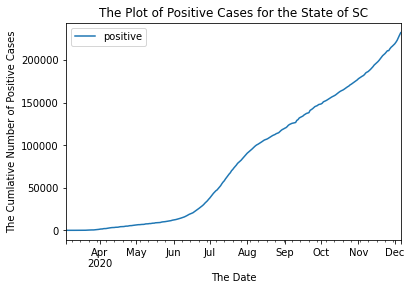

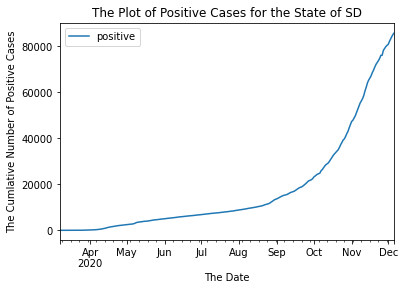

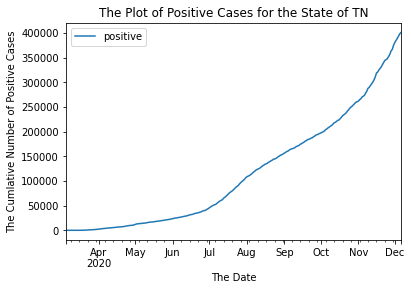

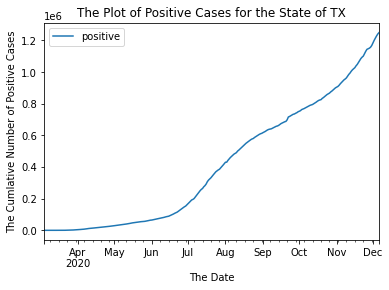

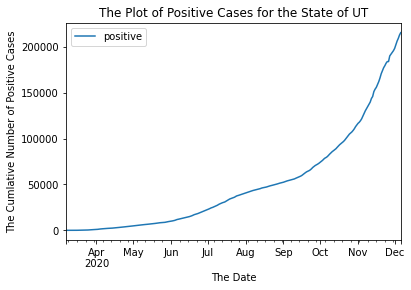

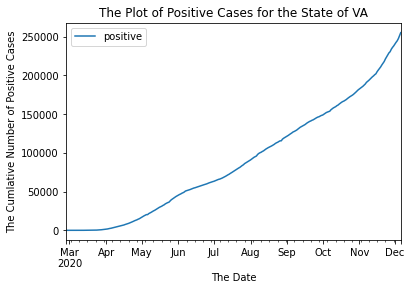

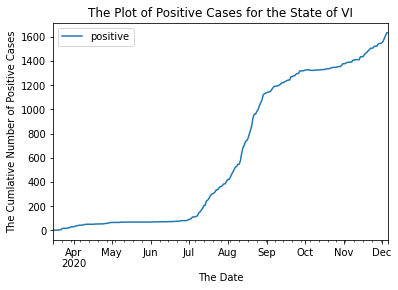

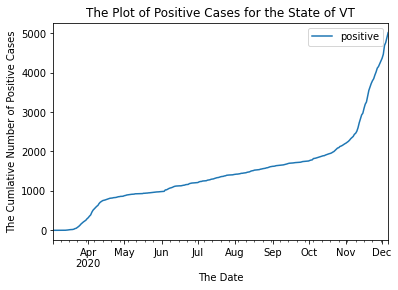

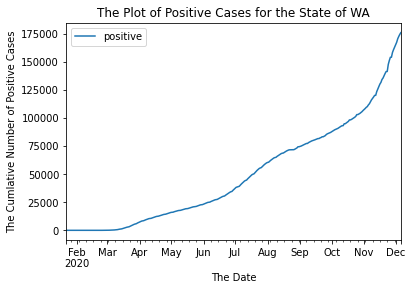

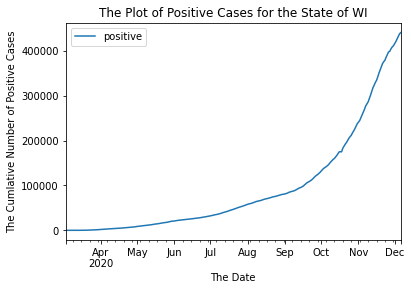

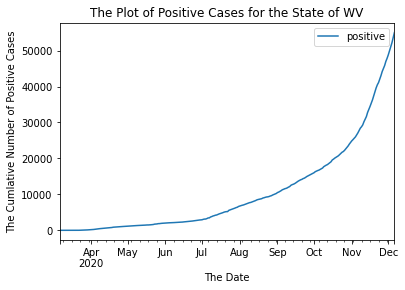

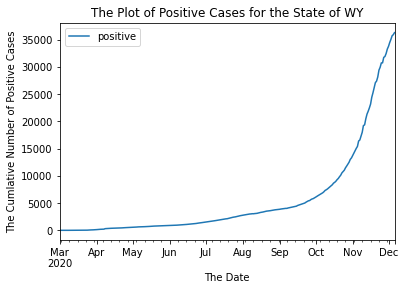

In [ ]:
group_by_state = us_covid_state_data.groupby('state')

for state_name, state_group in group_by_state:
    state_group.plot.line(x = 'date', y = 'positive', xlabel = 'The Date', ylabel = 'The Cumlative Number of Positive Cases')
    plt.title("The Plot of Positive Cases for the State of " + str(state_name))
    plt.show()


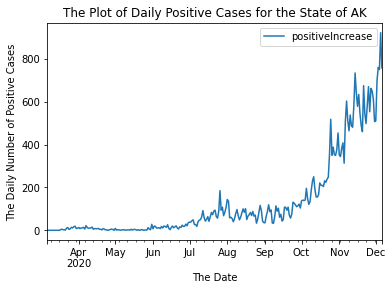

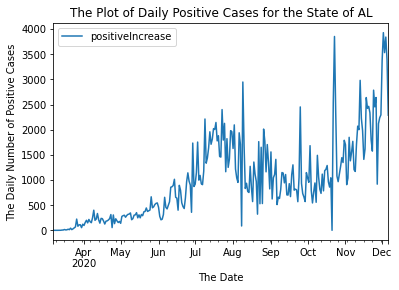

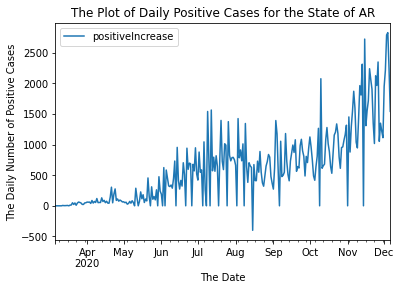

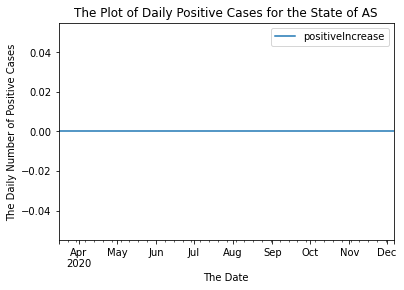

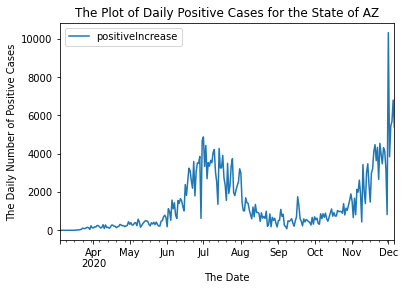

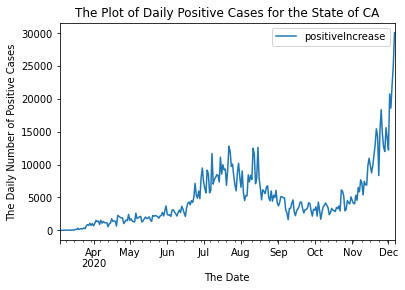

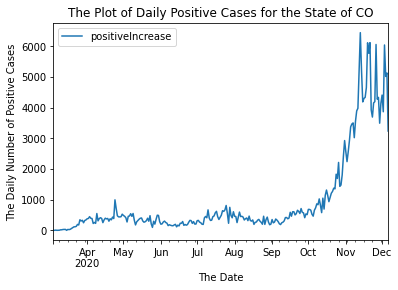

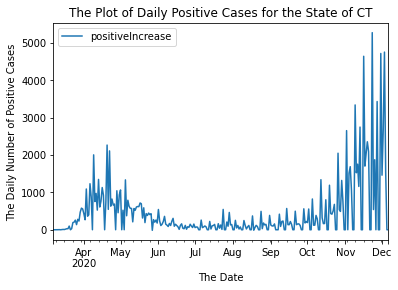

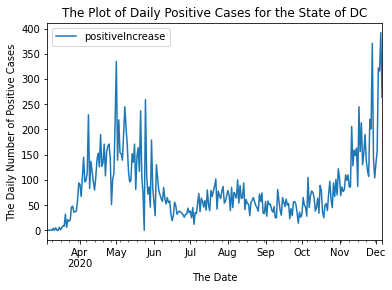

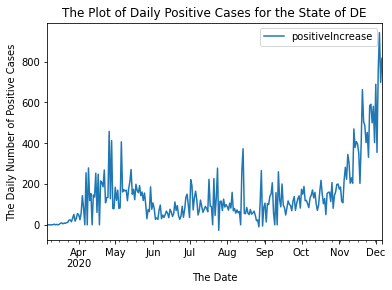

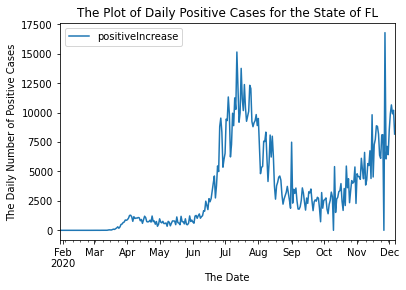

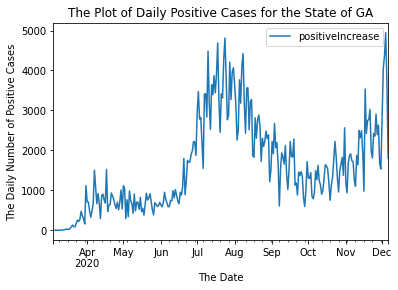

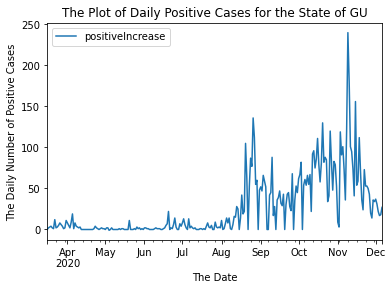

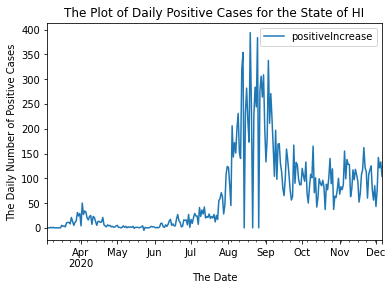

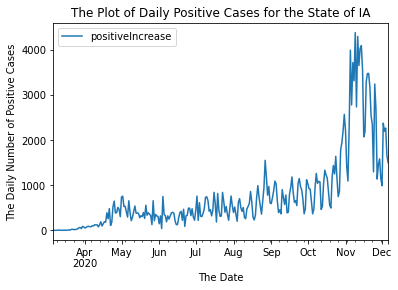

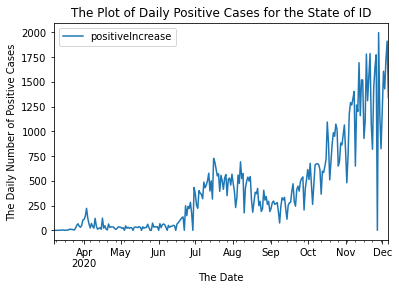

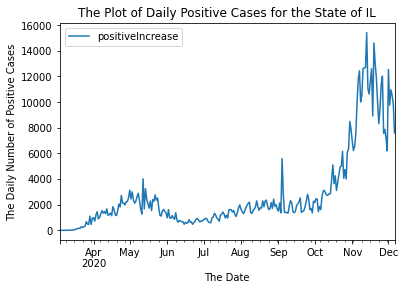

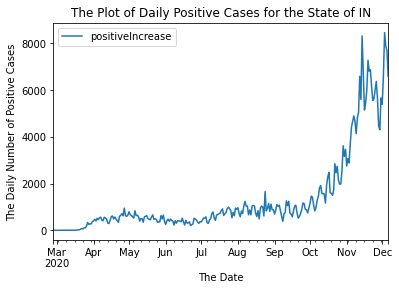

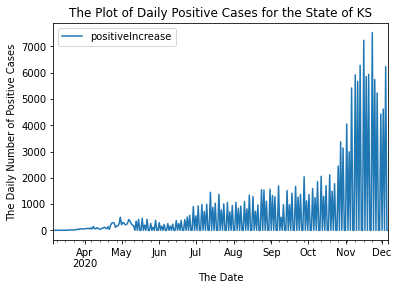

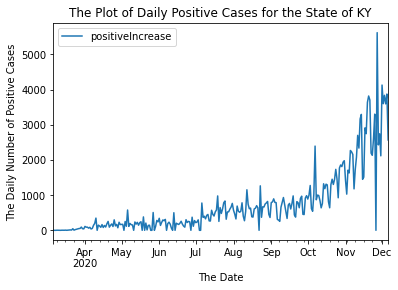

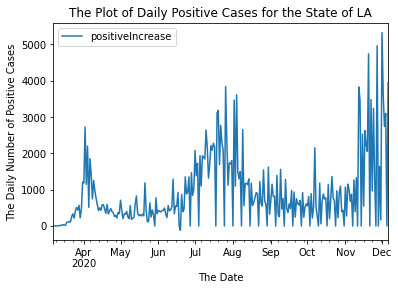

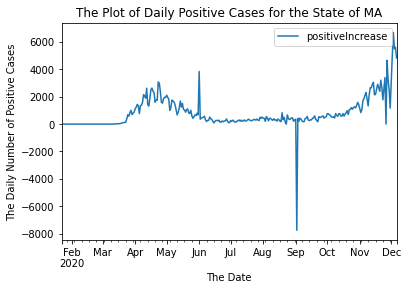

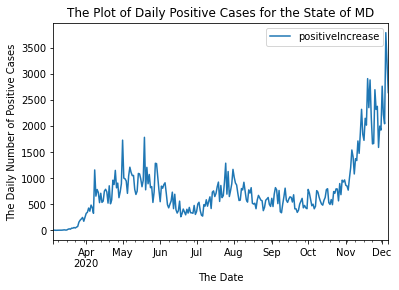

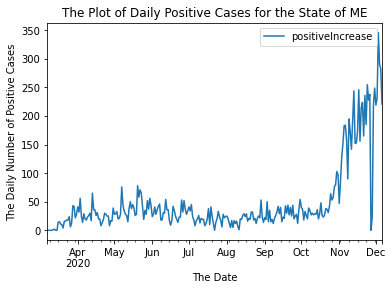

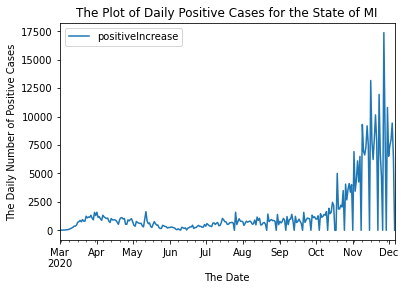

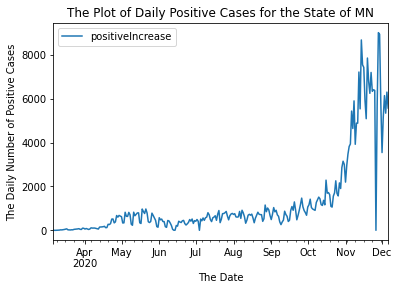

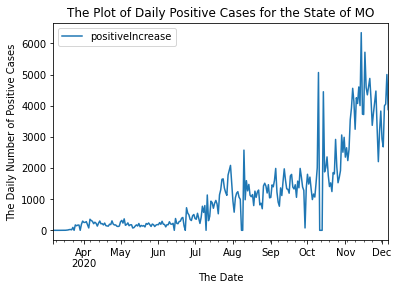

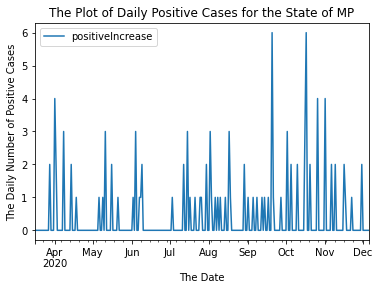

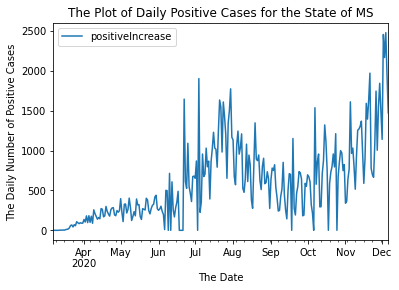

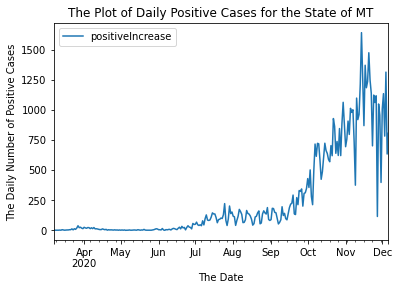

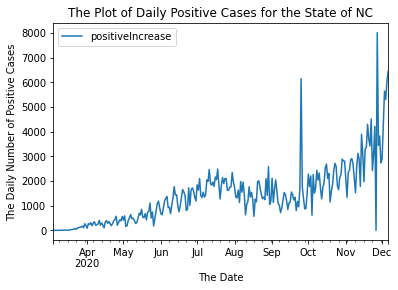

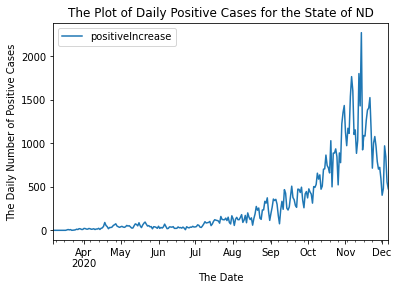

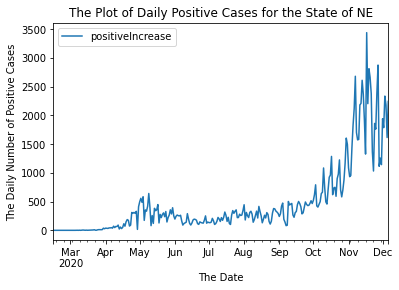

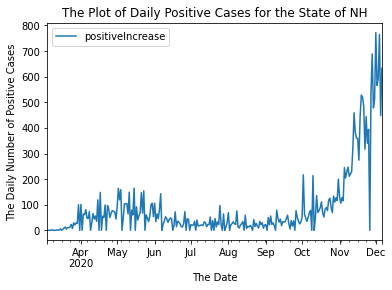

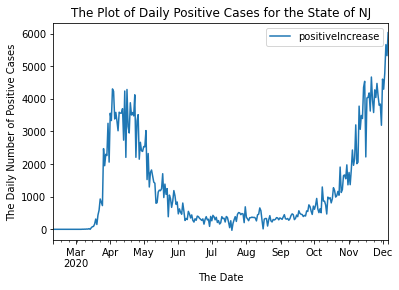

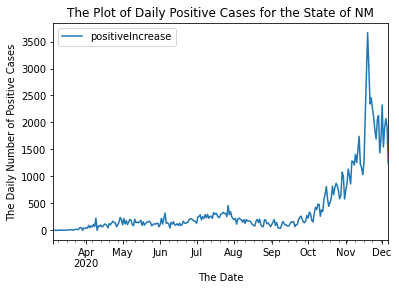

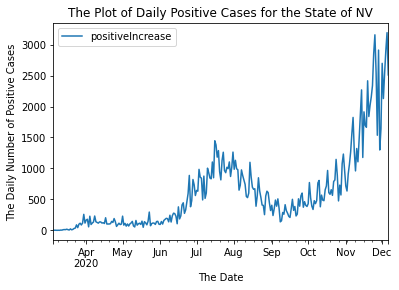

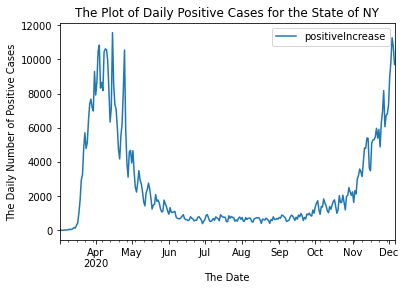

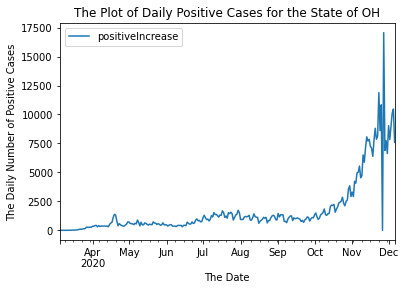

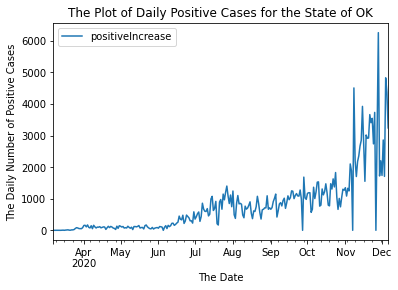

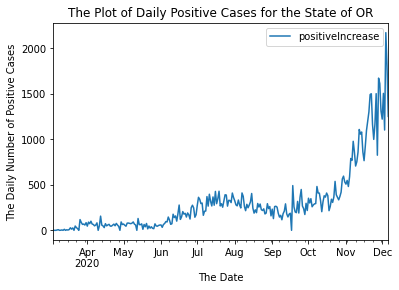

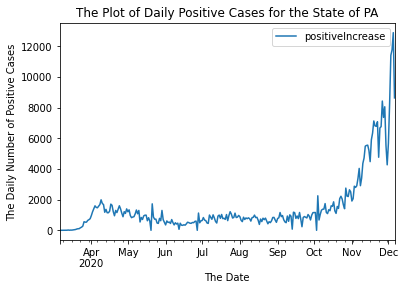

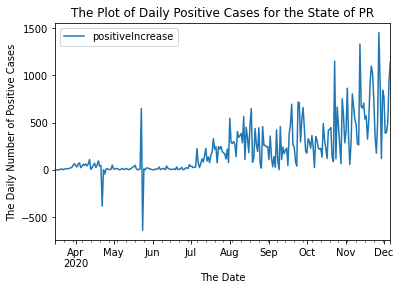

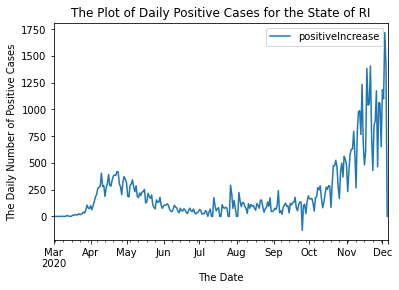

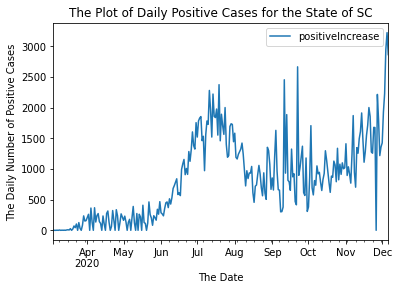

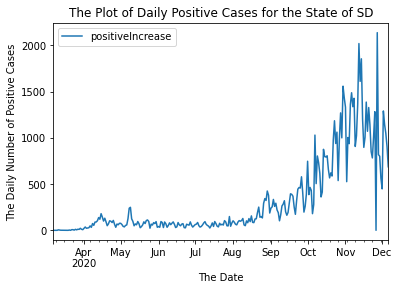

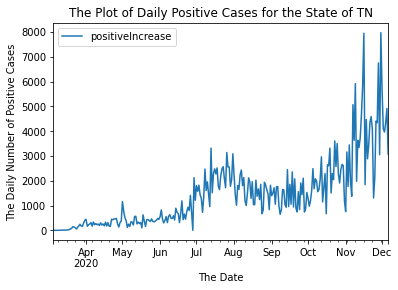

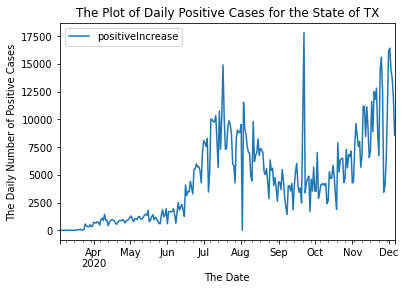

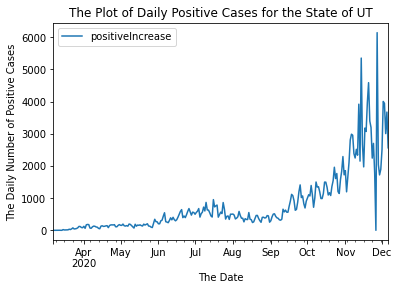

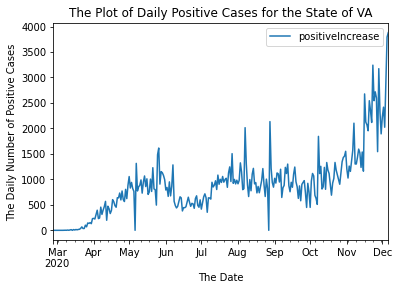

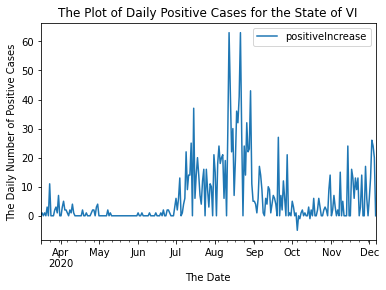

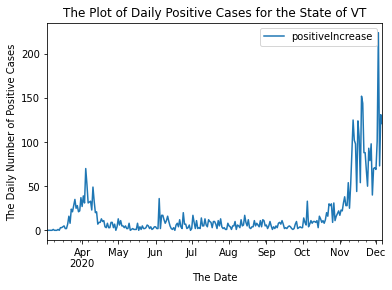

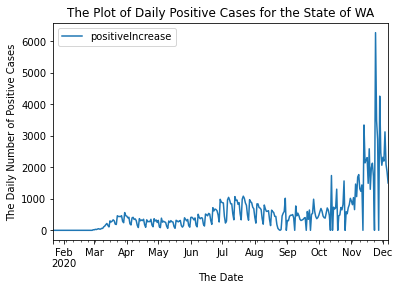

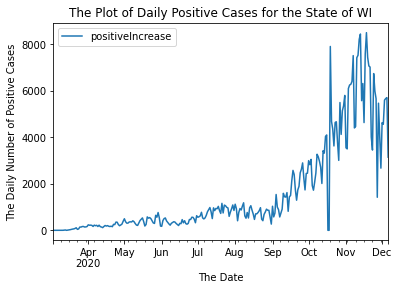

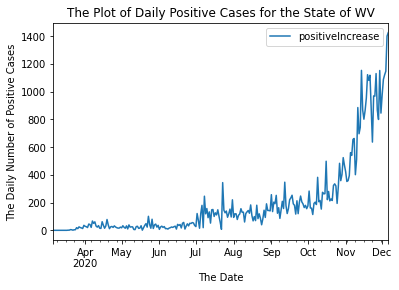

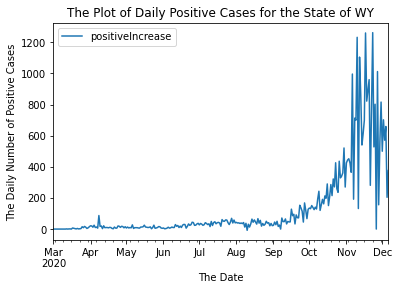

In [ ]:
for state_name, state_group in group_by_state:
    state_group.plot.line(x = 'date', y = 'positiveIncrease', xlabel = 'The Date', ylabel = 'The Daily Number of Positive Cases')
    plt.title("The Plot of Daily Positive Cases for the State of " + str(state_name))
    plt.show()

In [ ]:
us_covid_data = pd.read_csv('us_covid19_daily.csv')
us_covid_data['date'] = pd.to_datetime(us_covid_data['date'].astype(str))
# us_covid_data = us_covid_state_data.fillna(0)
us_covid_data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,2020-12-06,56,14534035,161986294,13592.0,101487.0,585676.0,20145.0,31946.0,7094.0,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
1,2020-12-05,56,14357264,160813704,13433.0,101190.0,583420.0,19950.0,31831.0,7005.0,...,202429337,2020-12-05T24:00:00Z,0,0,2445,3316,1526995,211073,2169756,6249216c5f097c94ce33a811dab011a483a42404
2,2020-12-04,56,14146191,159286709,12714.0,101276.0,580104.0,19858.0,31608.0,6999.0,...,200259581,2020-12-04T24:00:00Z,0,0,2563,4652,1260657,224831,1854869,ae30ea088584335ba4d57ee927f8dbda6add74db
3,2020-12-03,56,13921360,158026052,15106.0,100755.0,575452.0,19723.0,31276.0,6867.0,...,198404712,2020-12-03T24:00:00Z,0,0,2706,5331,1238465,210204,1828230,0f253d185ecb336cdd18a4c61996eda1b7eef13b
4,2020-12-02,56,13711156,156787587,14368.0,100322.0,570121.0,19680.0,31038.0,6855.0,...,196576482,2020-12-02T24:00:00Z,0,0,2733,5028,982032,195796,1459202,477c17b6302d0485195e77ecf8270a974f7a3c82


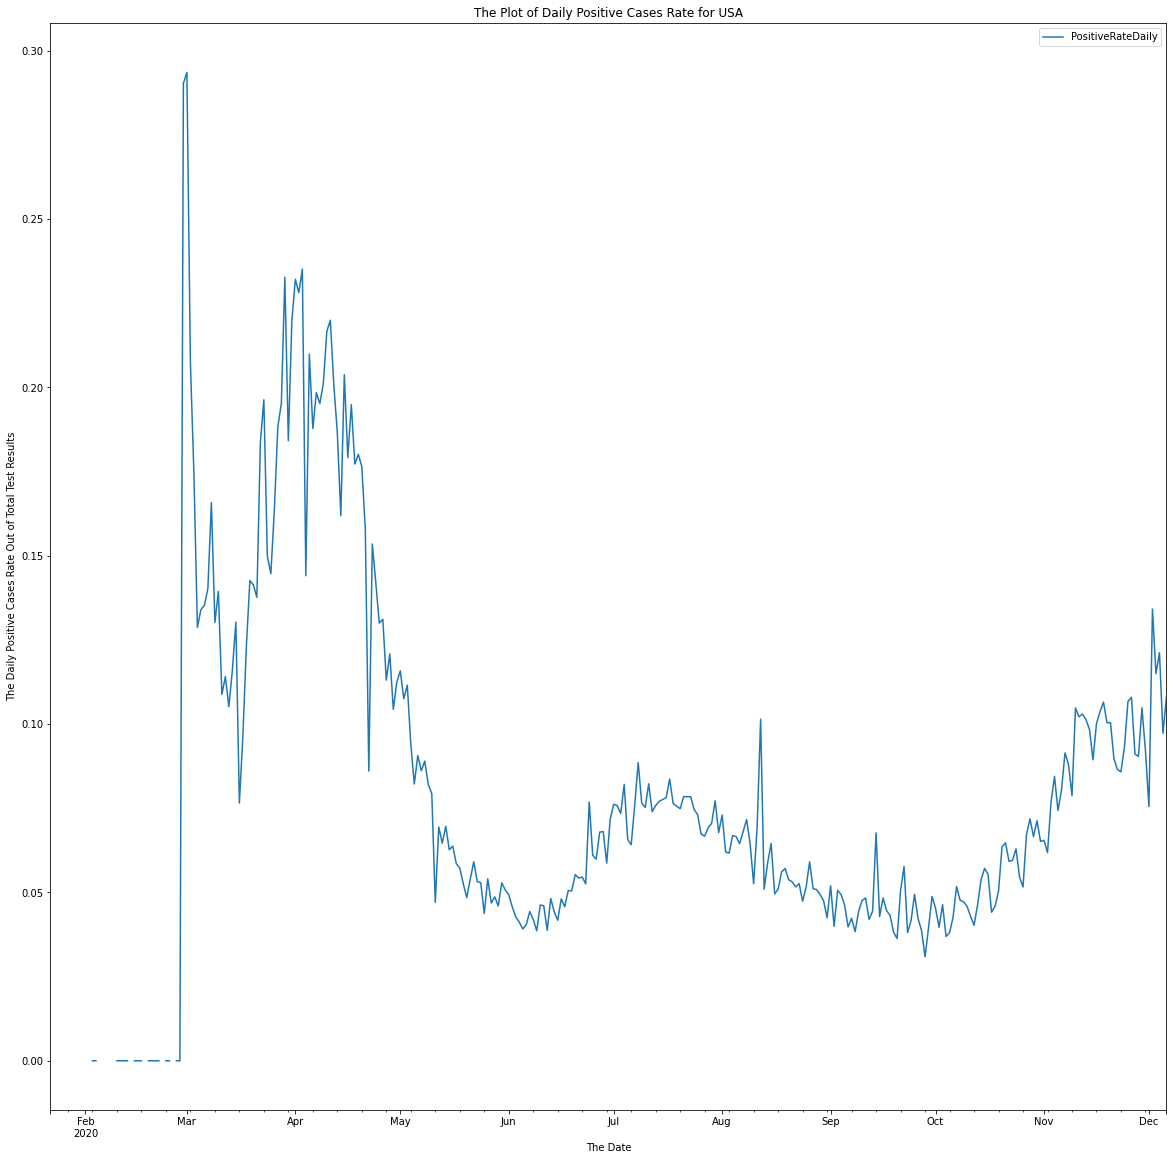

In [ ]:
us_covid_data['PositiveRateDaily'] = us_covid_data['positiveIncrease'] / us_covid_data['totalTestResultsIncrease']

fig, ax = plt.subplots(figsize=(20, 20))
us_covid_data.plot.line(x = 'date', y = 'PositiveRateDaily', xlabel = 'The Date', 
                        ylabel = 'The Daily Positive Cases Rate Out of Total Test Results',
                        ax = ax)
plt.title("The Plot of Daily Positive Cases Rate for USA")
plt.show()
    

In [6]:
us_covid_state_data.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-12-06,AK,35720.0,0.0,1042056.0,0.0,totalTestsViral,1077776.0,164.0,799.0,0.0,0.0,21.0,0.0,7165.0,A,12/6/2020 03:59,2020-12-06T03:59:00Z,12/05 22:59,143.0,799.0,2020-12-06T03:59:00Z,1077776.0,43746.0,1032815.0,0.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,757,9788,1077776,10545,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,0.0
1,2020-12-06,AL,269877.0,45962.0,1421126.0,0.0,totalTestsPeopleViral,1645041.0,1927.0,26331.0,0.0,2290.0,0.0,1317.0,168387.0,A,12/6/2020 11:00,2020-12-06T11:00:00Z,12/06 06:00,3889.0,26331.0,2020-12-06T11:00:00Z,0.0,0.0,0.0,223915.0,3462.0,427.0,0.0,1645041.0,0.0,0.0,0.0,74784.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2288,5769,1691003,7880,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,0.0
2,2020-12-06,AR,170924.0,22753.0,1614979.0,0.0,totalTestsViral,1763150.0,1076.0,9401.0,374.0,0.0,179.0,1038.0,149490.0,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,2660.0,9401.0,2020-12-06T00:00:00Z,1763150.0,0.0,1614979.0,148171.0,2437.0,223.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155934.0,27710.0,21856.0,3300.0,5,1542,13244,1785903,14704,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,0.0
3,2020-12-06,AS,0.0,0.0,2140.0,0.0,totalTestsViral,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,0.0,2020-12-01T00:00:00Z,2140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,0,0,2140,0,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,0.0
4,2020-12-06,AZ,364276.0,12590.0,2018813.0,0.0,totalTestsPeopleViral,2370499.0,2977.0,28248.0,714.0,0.0,462.0,0.0,56382.0,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,6950.0,28248.0,2020-12-06T00:00:00Z,0.0,0.0,0.0,351686.0,6431.0,519.0,0.0,2370499.0,370928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,5376,15661,2383089,20586,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,0.0


In [9]:
import plotly.express as px

def graph_covid_monthly_cases(df, month, colorFeature):
    fig = px.choropleth(df, locations='state', 
                        color=colorFeature,
                        color_continuous_scale="Oranges",
                        locationmode="USA-states",
                        scope="usa",
                        labels="state",
                        title= month + " 2020 COVID-19 " + colorFeature + " Cases")
    
    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0}, 
        title={'y':0.99,
            'x':0.48,
            'xanchor': 'center',
            'yanchor': 'top'
    })
    fig.show()

In [10]:
import datetime
for i in range(1, 13):
    monthly_state_data = us_covid_state_data.loc[pd.DatetimeIndex(us_covid_state_data['date']).month == i].groupby(['state']).sum().reset_index()
    datetime_object = datetime.datetime.strptime(str(i), "%m")
    month = datetime_object.strftime("%B")
    graph_covid_monthly_cases(monthly_state_data, month, 'positiveIncrease')

In [12]:
us_covid_state_data['positiveIncrease'].describe()

count    15633.000000
mean       929.695708
std       1771.139717
min      -7757.000000
25%         42.000000
50%        319.000000
75%        976.000000
max      30075.000000
Name: positiveIncrease, dtype: float64

In [13]:
import datetime
for i in range(1, 13):
    monthly_state_data = us_covid_state_data.loc[pd.DatetimeIndex(us_covid_state_data['date']).month == i].groupby(['state']).sum().reset_index()
    datetime_object = datetime.datetime.strptime(str(i), "%m")
    month = datetime_object.strftime("%B")
    graph_covid_monthly_cases(monthly_state_data, month, 'totalTestResultsIncrease')

In [14]:
import datetime
for i in range(1, 13):
    monthly_state_data = us_covid_state_data.loc[pd.DatetimeIndex(us_covid_state_data['date']).month == i].groupby(['state']).sum().reset_index()
    monthly_state_data['positiveRateIncrease'] = monthly_state_data['positiveIncrease'] / monthly_state_data['totalTestResultsIncrease']
    datetime_object = datetime.datetime.strptime(str(i), "%m")
    month = datetime_object.strftime("%B")
    graph_covid_monthly_cases(monthly_state_data, month, 'positiveRateIncrease')